In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print(train_data.head())
print(train_data.info())



  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
<c

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


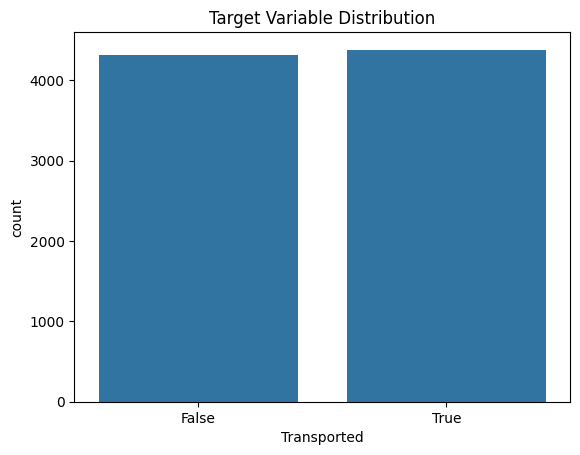

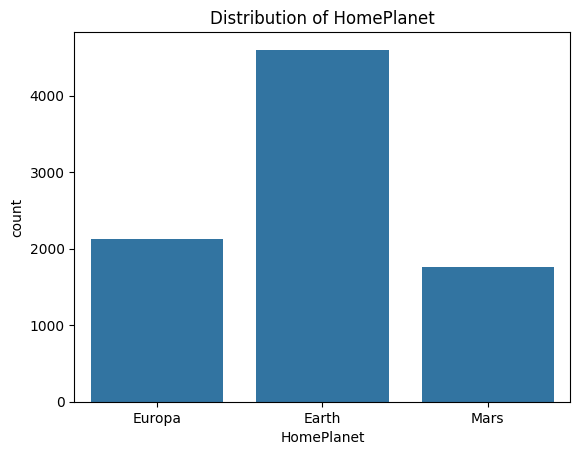

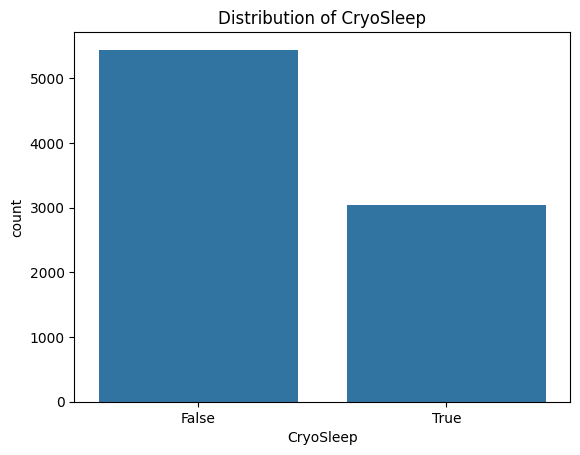

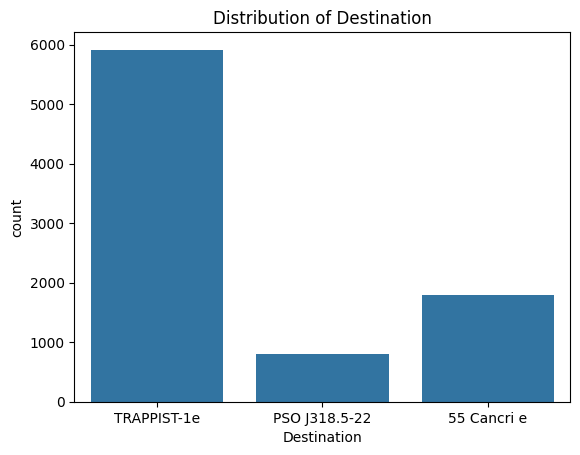

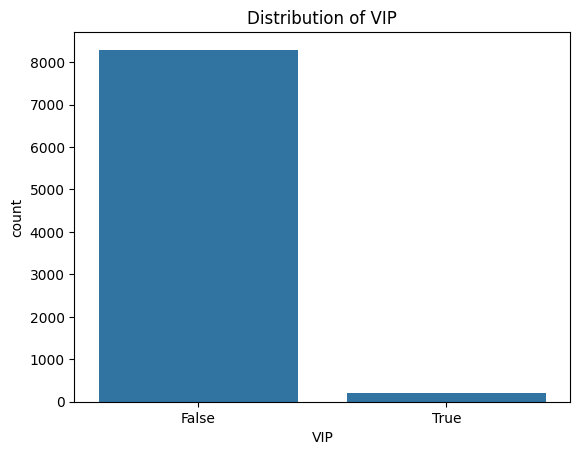

In [2]:
print(train_data.isnull().sum())

sns.countplot(x='Transported', data=train_data)
plt.title("Target Variable Distribution")
plt.show()

train_data.describe()

for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    sns.countplot(x=col, data=train_data)
    plt.title(f"Distribution of {col}")
    plt.show()


In [3]:
train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True)


In [4]:
train_data['Group'] = train_data['PassengerId'].str.split('_').str[0]
train_data['Individual'] = train_data['PassengerId'].str.split('_').str[1]

test_data['Group'] = test_data['PassengerId'].str.split('_').str[0]
test_data['Individual'] = test_data['PassengerId'].str.split('_').str[1]


In [5]:
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_data['TotalSpend'] = train_data[spend_cols].sum(axis=1)
test_data['TotalSpend'] = test_data[spend_cols].sum(axis=1)


In [6]:
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

for col in ['Age', 'TotalSpend']:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)


C:\Users\shhmr\AppData\Local\Temp\ipykernel_19508\860440934.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)
C:\Users\shhmr\AppData\Local\Temp\ipykernel_19508\860440934.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [7]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

encoder = LabelEncoder()
for col in categorical_cols:
    train_data[col] = encoder.fit_transform(train_data[col])
    test_data[col] = encoder.transform(test_data[col])


In [8]:
X = train_data.drop(['PassengerId', 'Name', 'Cabin', 'Transported'], axis=1)
y = train_data['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.7924094307073031
              precision    recall  f1-score   support

       False       0.79      0.80      0.79       861
        True       0.80      0.79      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [10]:
X_test = test_data.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

test_predictions = model.predict(X_test)


In [11]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': test_predictions
})

submission['Transported'] = submission['Transported'].astype(bool)

submission.to_csv("submission.csv", index=False)
